In [20]:
import matplotlib.pyplot as pp
import numpy as np
import random
import copy

# Librería para emplear la red neuronal Perceptrón Multicapa como clasificador
from sklearn.neural_network import MLPClassifier

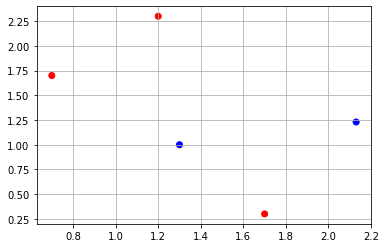

In [6]:
%matplotlib inline

x1 = np.array([1.2, 1.7, 1.3, 0.7, 2.13])
x2 = np.array([2.3, 0.3, 1.0, 1.7, 1.23])

d = [0, 0, 1, 0, 1]

pp.scatter(x1, x2, color = ['blue' if k==1 else 'red' for k in d])
pp.grid(True)
pp.show()


Como se aprecia en la figura anterior, los puntos rojos (clase 1) de los puntos azules (clase 2) no se pueden separar con una sóla línea (no son separables linealmente).

In [19]:
# Creamos una red neuronal multicapa (Perceptrón)
entradas = 2
neuronas_capa_oculta = 7
neuronas_capa_salida = 1

mlp = MLPClassifier(solver = 'lbfgs', activation = 'logistic', hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida), \
                   max_iter = 3000, verbose = True)

print(mlp)
entradas = np.array([[x1[i],x2[i]] for i in range(len(x1))])


# Entrenamos la red neuronal (pasándole las entradas y las salidas deseadas)
mlp.fit(entradas,d)

# Visualizamos los pesos de la capa oculta
print(mlp.coefs_[0])
# Visualizamos los pesos de la capa salida
print(mlp.coefs_[1])

# Probamos la red neuronal con las entradas con las que se entrenó
print('Predicción de resultados de la RNA: ')
res = 0
for patron in entradas:
    print(patron.reshape(1, -1))
    res = mlp.predict(patron.reshape(1,-1))
    print('Salida: ', res)

MLPClassifier(activation='logistic', hidden_layer_sizes=(7, 1), max_iter=3000,
              solver='lbfgs', verbose=True)
[[-0.56217294  1.30530313  1.89359357  2.16954148 -2.6824368  -3.71859102
  -2.15618959]
 [ 2.21334571  0.30262675  0.82821207 -1.09493175  2.77957132  2.91638519
   5.65955103]]
[[ 1.06595633]
 [-0.42756181]
 [-1.24908874]
 [ 0.03940913]
 [-3.9324298 ]
 [-3.59281457]
 [ 6.01790854]]
Predicción de resultados de la RNA: 
[[1.2 2.3]]
Salida:  [0]
[[1.7 0.3]]
Salida:  [0]
[[1.3 1. ]]
Salida:  [1]
[[0.7 1.7]]
Salida:  [0]
[[2.13 1.23]]
Salida:  [1]


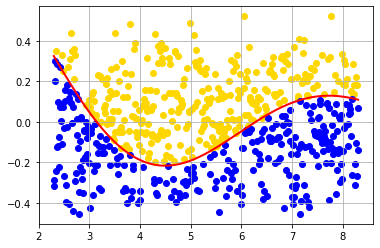

601


In [39]:
ecuacion = lambda x : np.sin(x)/x

def dibujar(rango = [2.3, 8.3]):
    x = np.arange(rango[0], rango[1], 0.01)
    y = ecuacion(x)
    
    z = copy.copy(x)
    random.shuffle(z)
    yh = [yi+random.uniform(-0.25, 0.25) for yi in y]
    
    puntos_clase1 = []
    puntos_clase2 = []
    
    data = []
    salidas_deseadas = []
    
    for i in range(len(z)):
        if yh[i]>=ecuacion(z[i]):
            puntos_clase1.append([z[i],yh[i]])
            salidas_deseadas.append(1)
        else:
            puntos_clase2.append([z[i],yh[i]])
            salidas_deseadas.append(0)
    
    salidas_deseadas = np.array(salidas_deseadas)
    puntos_clase1 = np.array(puntos_clase1)
    puntos_clase2 = np.array(puntos_clase2)
    
    data = np.vstack((puntos_clase1, puntos_clase2))
    
    pp.scatter(puntos_clase1[:,0], puntos_clase1[:,1], color = 'gold')
    pp.scatter(puntos_clase2[:,0], puntos_clase2[:,1], color = 'blue')
    
    pp.plot(x,y,lw = 2.0, color = 'red')
    pp.grid(True)
    pp.show()
    
    print(len(x))
    return (salidas_deseadas, data)
    
salidas_deseadas, data = dibujar()

# Ejemplo de cómo dividir el corpus en train y test

In [36]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, salidas_deseadas, test_size = 0.3,\
                                                    stratify = salidas_deseadas)

print('Tamaño X_train: ',X_train.shape)

Tamaño X_train:  (420, 2)
